# SEL0634 - Laboratório de Robôs Manipuladores

## Inicialização da biblioteca 

In [1]:
!pip install spatialmath-python
!pip install sympy


     |████████████████████████████████| 178 kB 4.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 38.1 MB 54.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for ansitable: filename=ansitable-0.9.6-py3-none-any.whl size=12621 sha256=9534bd485ffccc665ab79abccc60912d4c41ad5c329486fec44bb579f15f04d0
  Stored in directory: /home/jovyan/.cache/pip/wheels/57/a4/a9/84ed983596f261a978c880aba60eba145e76aa5a59e455f189
  Created wheel for colored: filename=colored-1.4.3-py3-none-any.whl size=14342 sha256=b36dc5ac260ea380d2452f9762e1bf2740e84849d1b120f0f89a24050eaf82ea
  Stored in directory: /home/jovyan/.cache/pip/wheels/4a/f6/00/835e81851bc345428a253721c8bdad0062721dfb861bc6e752
Successfully built ansitable colored
     |████████████████████████████████| 6.4 MB 4.7 MB/s            
     |████████████████████████████████| 532 kB 58.4 MB/s            


In [3]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
# no Binder utilizar essa linha
# %matplotlib notebook  
# no Colab utilizar essa linha
%matplotlib inline  


## Tarefa 1 - Sequencia de Rotações Aplicadas em um Cubo

### Desenhar cubo na posição inicial

Considere a seguinte função para desenhar os vértices de um cubo:

In [15]:
def plot_cubo_grafico(cubo,grafico):
  grafico.scatter(xs=cubo[0], ys=cubo[1], zs=cubo[2], s=20)  # draw vertices
  # draw lines joining the vertices
  lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
  for line in lines:
      grafico.plot([cubo[0,i] for i in line], [cubo[1,i] for i in line], [cubo[2,i] for i in line])
    # List comprehension, https://stackoverflow.com/questions/11479392/what-does-a-for-loop-within-a-list-do-in-python
    
def plot_cubo(cubo):
  fig = plt.figure()
  SE3().plot(frame='0', dims=[-2,3,-2,3,0,5], color='black') # Plot system of coordinates
  grafico = plt.gca()
  plot_cubo_grafico(cubo,grafico)

Considere que na posição inicial, o cubo possui vértices $^0P_i$ posicionados  em relação ao sistema inercial $\{0\}$ nas seguintes coordenadas:

In [47]:
P = np.array([[0, 2, 2, 0, 0, 2, 2, 0], [0, 0, 2, 2, 0, 0, 2, 2], [0, 0, 0, 0, 2, 2, 2, 2]])
print("cubo = ", P)
print("cubo[0] = ", P[0])
print("cubo[1] = ", P[1])
print("cubo[2] = ", P[2])

lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
line = lines[1]
print(lines[0][3])
print("cubo[0,i],cubo[1,i],cubo[2,i] = ", [P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])

cubo =  [[0 2 2 0 0 2 2 0]
 [0 0 2 2 0 0 2 2]
 [0 0 0 0 2 2 2 2]]
cubo[0] =  [0 2 2 0 0 2 2 0]
cubo[1] =  [0 0 2 2 0 0 2 2]
cubo[2] =  [0 0 0 0 2 2 2 2]
6
cubo[0,i],cubo[1,i],cubo[2,i] =  [2, 2, 2, 0] [0, 2, 2, 2] [0, 0, 2, 2]


Para plotar o cubo:

<Figure size 432x288 with 0 Axes>

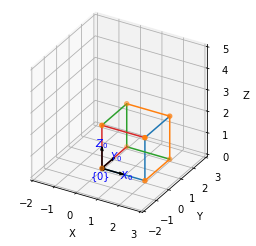

In [16]:
plot_cubo(P)

### Primeira transformação

Aplique uma rotação no cubo em torno do eixo $x$ de um ângulo de $90^o$ e mostre os vertices do cubo nesta nova pose. 

Considere que um sistema de coordenadas fixo no cubo após esta rotação está com orientação dada por $\{1\}$, ou seja, após essa primeira rotação, a matriz $^0R_1$ representa a orientação do sistema de coordenadas fixo no cubo em relação ao sistema inercial. 

<Figure size 432x288 with 0 Axes>

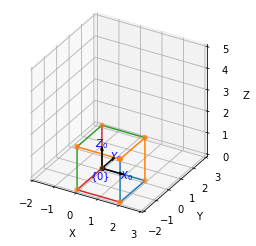

In [34]:
#########################
# Coloque seu código aqui

#H1 = SE3(0,0,0)*SE3.Rx(90,'deg')
T01 = SE3(0,0,0) # Translação
R01 = SE3.Rx(90,'deg') # Rotação
H01 = T01*R01 # Matriz de transformação homogênea completa

P01 = H01*P

#########################
plot_cubo(P01)

### Segunda transformação

Aplique uma nova rotação no cubo em torno do eixo $z$ do sistema atual $\{1\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{2\}$, ou seja, a matriz $^0R_2$ representa a orientação do cubo em relação ao sistema inercial.



<Figure size 432x288 with 0 Axes>

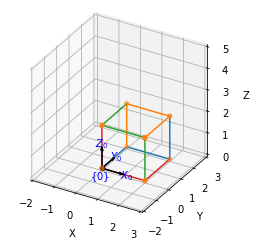

In [33]:
#########################
# Coloque seu código aqui
R12 = SE3.Rz(90,'deg')
H12 = R12

P02 = H12*P01

########################
plot_cubo(P02)

### Terceira transformação

Aplique uma nova rotação no cubo em torno do eixo $y$ do sistema inercial $\{0\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{3\}$, ou seja, a matriz $^0R_3$ representa a orientação do cubo em relação ao sistema inercial.




In [ ]:
#########################
# Coloque seu código aqui
P03 = 

#########################
plot_cubo(P03)

### Matrizes de rotação

Quais são as matrizes de rotação: 

$^0R_1 =$

In [ ]:
# Mostre a matriz de rotação aqui

$^0R_2 = $

In [ ]:
# Mostre a matriz de rotações aqui

$^0R_3 = $

In [ ]:
# Mostre a matriz de rotações aqui